In [1]:
# predict humidity at 3 pm

# *Problem statement:
    Create a model that will help me predict relative humidity at 3 pm

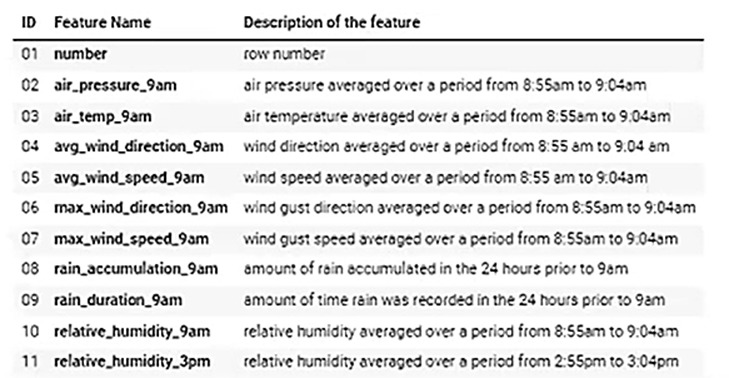

In [23]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("daily_weather.csv")
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [4]:
data.shape
#rows = 1095 col=11

(1095, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [6]:
#find missing value
data.isna().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [7]:
# data.fillna({"air_pressure_9am":data["air_pressure_9am"].median(),
#             "air_temp_9am":data["air_temp_9am"].median(),
#             "avg_wind_direction_9am":data["avg_wind_direction_9am"].median(),
#             "avg_wind_speed_9am":data["avg_wind_speed_9am"].median(),
#             "max_wind_direction_9am":data["max_wind_direction_9am"].median(),
#             "max_wind_speed_9am":data["max_wind_speed_9am"].median(),
#             "rain_accumulation_9am":data["rain_accumulation_9am"].median(),
#             "rain_duration_9am":data["rain_duration_9am"].median()},inplace=True)

In [8]:
data.isna().sum()

number                    0
air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [9]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [10]:
col_missing_value=['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

In [11]:
for col in col_missing_value:
    md=data[col].median()
    print(f"median value in {md} of column is {col}")
    data.fillna({col:md},inplace=True)

median value in 918.9210452583593 of column is air_pressure_9am
median value in 65.7154790488537 of column is air_temp_9am
median value in 166.0 of column is avg_wind_direction_9am
median value in 3.8713333518840805 of column is avg_wind_speed_9am
median value in 177.29999999999993 of column is max_wind_direction_9am
median value in 4.943637399999937 of column is max_wind_speed_9am
median value in 0.0 of column is rain_accumulation_9am
median value in 0.0 of column is rain_duration_9am


In [12]:
data.isna().sum()

number                    0
air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
relative_humidity_3pm     0
dtype: int64

In [13]:
x=data.drop(["number","relative_humidity_3pm"],axis=1)
x.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000


In [14]:
y=data["relative_humidity_3pm"]
y

0       36.160000
1       19.426597
2       14.460000
3       12.742547
4       76.740000
          ...    
1090    38.180000
1091    73.340000
1092    52.310000
1093    58.280000
1094    15.100000
Name: relative_humidity_3pm, Length: 1095, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3243287,shuffle=True)
print(f"x_train{x_train.shape}")
print(f"y_train{y_train.shape}")
print(f"x_test{x_test.shape}")
print(f"y_test{y_test.shape}")

x_train(876, 9)
y_train(876,)
x_test(219, 9)
y_test(219,)


In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtr=DecisionTreeRegressor(min_samples_split=150,max_depth=4)
#train model
dtr.fit(x_train,y_train)
# evaluate model
y_pred=dtr.predict(x_test)
y_pred

array([50.98839745, 17.88380498, 50.98839745, 50.98839745, 38.15802424,
       13.12120693, 50.98839745, 23.34971938, 17.88380498, 17.88380498,
       17.88380498, 50.98839745, 23.34971938, 17.88380498, 17.88380498,
       17.88380498, 23.34971938, 50.98839745, 26.56912137, 17.88380498,
       17.88380498, 23.34971938, 50.98839745, 71.89959459, 26.56912137,
       26.56912137, 23.34971938, 26.56912137, 50.98839745, 23.34971938,
       17.88380498, 38.15802424, 50.98839745, 50.98839745, 17.88380498,
       17.88380498, 71.89959459, 50.98839745, 50.98839745, 26.56912137,
       17.88380498, 17.88380498, 50.98839745, 13.12120693, 50.98839745,
       71.89959459, 71.89959459, 50.98839745, 50.98839745, 38.15802424,
       50.98839745, 17.88380498, 34.3085536 , 71.89959459, 17.88380498,
       34.3085536 , 26.56912137, 23.34971938, 17.88380498, 71.89959459,
       17.88380498, 13.12120693, 23.34971938, 17.88380498, 71.89959459,
       71.89959459, 17.88380498, 17.88380498, 13.12120693, 23.34

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
rmse=sqrt(mean_squared_error(y_test,y_pred))
rmse

9.298378055044088

In [21]:
from sklearn.metrics import r2_score
r_squere=r2_score(y_test,y_pred)
r_squere

0.8126543822036018

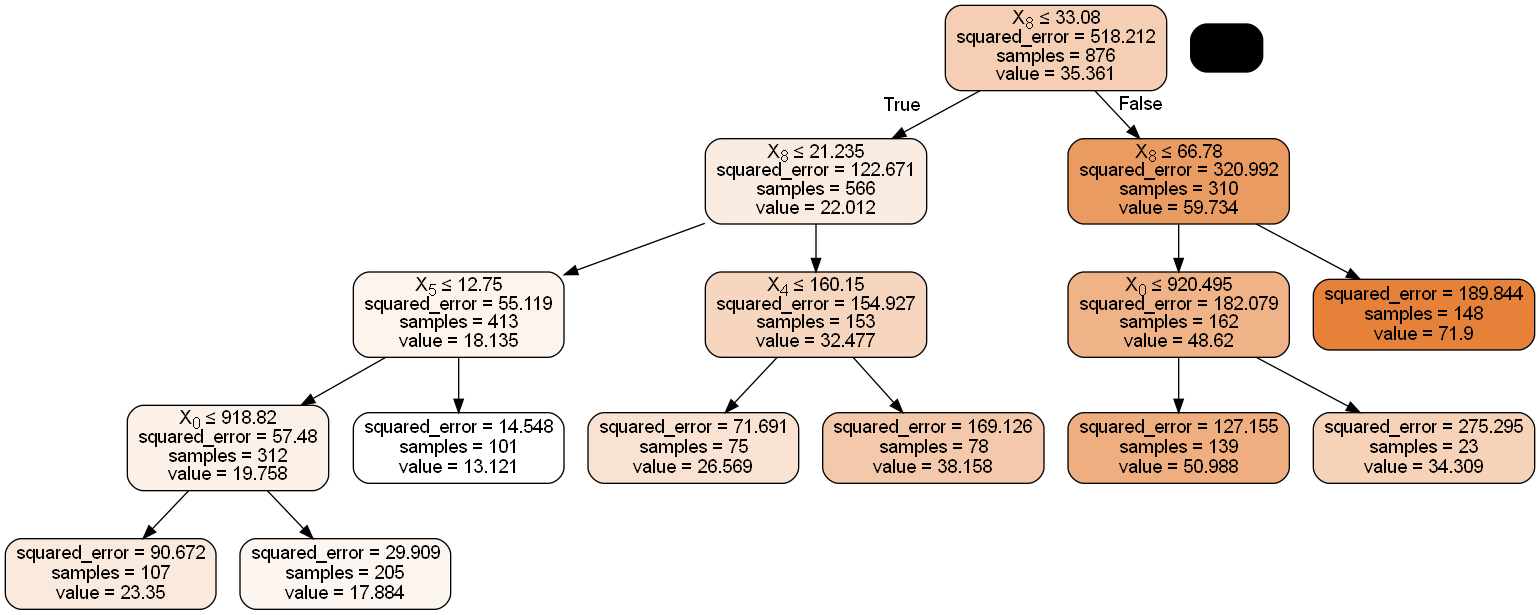

In [22]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_tree=export_graphviz(decision_tree=dtr,
                        filled=True,
                        rounded=True,
                        special_characters=True )
graph=pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

In [27]:
import pickle

In [28]:
pickle.dump(dtr,open("weather_dtr.pkl","wb"))

In [29]:
x_test.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [ ]:
# 9

In [31]:
x_test.describe(())

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,919.201578,65.499078,143.288422,5.219710,149.159646,6.714475,0.052397,148.311744,34.092984
std,3.133758,10.975597,65.785898,4.356617,66.995016,5.291469,0.424032,783.986965,23.822886
min,912.500000,39.956000,18.400000,0.961884,38.300000,1.482194,0.000000,0.000000,6.929473
50%,918.790000,66.056000,164.500000,3.758059,179.000000,4.854160,0.000000,0.000000,25.561411
max,929.320000,90.266000,331.800000,21.541732,312.200000,26.351153,5.560000,6440.000000,92.340000


In [32]:
x_test.dtypes

air_pressure_9am          float64
air_temp_9am              float64
avg_wind_direction_9am    float64
avg_wind_speed_9am        float64
max_wind_direction_9am    float64
max_wind_speed_9am        float64
rain_accumulation_9am     float64
rain_duration_9am         float64
relative_humidity_9am     float64
dtype: object